****
# Introduction
****

*Author: Samanyu*

*Language: Python*

*Accelerator: None*

**The Aim of this Notebook is to Successfully predict the probabaility of the PCOS variable**

**If you liked this notebook Kindly Upvote and share :)**

****
# Overview
****

*Same is available in the Datacard*

Polycystic ovary syndrome (PCOS) is a common endocrine disorder that affects the reproductive health and quality of life of millions of women worldwide. Research has shown that lifestyle choices such as diet, exercise, stress management, etc. have a significant impact on the pathogenesis and symptom relief of PCOS. However, there are still many gaps in research on the relationship between lifestyle and PCOS, especially in terms of individual differences and comprehensive lifestyle interventions.

In order to promote research progress in this field, we are organizing the "Polycystic Ovary Syndrome (PCOS) Lifestyle Impact Research Competition". The aim is to use data-driven methods to deeply analyze the impact of lifestyle choices on PCOS, and provide scientific basis for clinical intervention and health management.

****
# Reading the Data
****

In [1]:
# Importing
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
tr=pd.read_csv(r'/kaggle/input/exploring-predictive-health-factors/train.csv')
tr #Reading and displaying the Training Set

,ID,Age,Weight_kg,PCOS,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Conception_Difficulty,Insulin_Resistance,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Exercise_Benefit
0,0,20-25,64.0,No,No,No,No,No,No,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,Somewhat
1,1,15-20,55.0,No,No,No,No,No,No,6-8 Times a Week,No Exercise,Less than 30 minutes,6-8 hours,Somewhat
2,2,15-20,91.0,No,No,No,Yes,No,No,Rarely,"Cardio (e.g., running, cycling, swimming)",Less than 30 minutes,6-8 hours,Somewhat
3,3,15-20,56.0,No,No,No,No,No,No,6-8 Times a Week,"Cardio (e.g., running, cycling, swimming)",45 minutes,6-8 hours,Not at All
4,4,15-20,47.0,No,Yes,No,No,No,No,Rarely,No Exercise,Not Applicable,6-8 hours,Not Much
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,205,20-25,57.0,No,No,No,No,No,No,Rarely,No Exercise,Not Applicable,Less than 6 hours,Somewhat
206,206,Less than 20,53.6,No,Yes,Yes,Yes,No,No,Rarely,No Exercise,Not Applicable,6-8 hours,Somewhat
207,207,30-35,30.0,No,No,No,No,No,No,1-2 Times a Week,Cardio (e.g.,30 minutes,6-8 hours,Somewhat
208,208,20-25,65.0,No,No,No,Yes,No,No,1-2 Times a Week,No Exercise,Less than 30 minutes,Less than 6 hours,Somewhat


In [3]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     210 non-null    int64  
 1   Age                    209 non-null    object 
 2   Weight_kg              208 non-null    float64
 3   PCOS                   210 non-null    object 
 4   Hormonal_Imbalance     208 non-null    object 
 5   Hyperandrogenism       207 non-null    object 
 6   Hirsutism              205 non-null    object 
 7   Conception_Difficulty  209 non-null    object 
 8   Insulin_Resistance     209 non-null    object 
 9   Exercise_Frequency     208 non-null    object 
 10  Exercise_Type          208 non-null    object 
 11  Exercise_Duration      208 non-null    object 
 12  Sleep_Hours            208 non-null    object 
 13  Exercise_Benefit       209 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 23.1+ KB

****
# Data Preprocessing
****

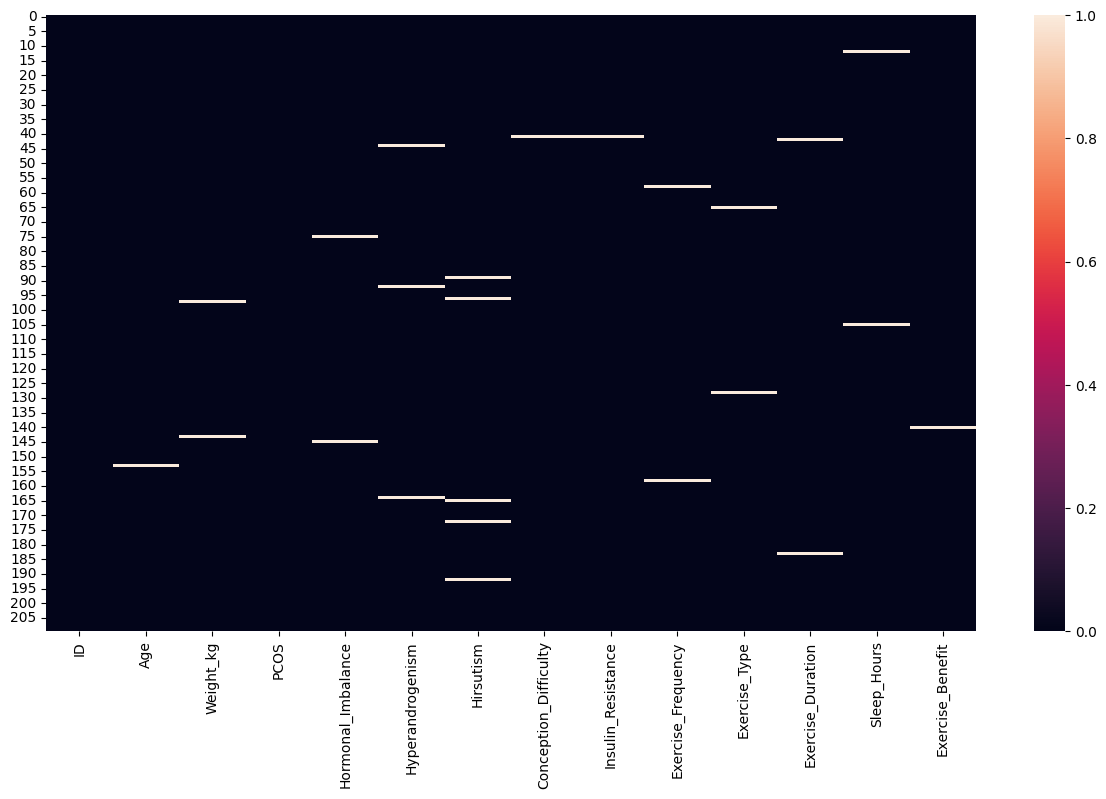

In [4]:
# Checking for null values
plt.figure(figsize=(15,8))
sns.heatmap(tr.isnull())
plt.show()

In [5]:
# Digging deeper into these null values
for col in tr.columns:
    if tr[col].isnull().any()==True:
        print(tr[col].value_counts())

Age
20-25              125
15-20               50
Less than 20        18
35-44                4
25-30                4
45 and above         3
30-35                2
30-25                1
30-40                1
Less than 20-25      1
Name: count, dtype: int64
Weight_kg
47.0     12
56.0     11
53.0      9
52.0      9
55.0      8
70.0      8
41.0      7
54.0      7
49.0      7
66.0      7
59.0      6
48.0      6
51.0      6
67.0      5
45.0      5
60.0      5
62.0      5
57.0      5
58.0      5
50.0      5
43.0      4
68.0      4
65.0      4
63.0      3
61.0      3
42.0      3
30.0      3
40.0      3
64.0      3
44.0      3
71.0      3
85.0      2
74.0      2
46.0      2
73.0      2
72.0      2
69.0      2
92.0      1
54.6      1
84.0      1
91.0      1
79.0      1
80.0      1
37.5      1
36.0      1
20.0      1
36.5      1
39.0      1
82.0      1
116.0     1
52.5      1
81.0      1
37.0      1
48.5      1
75.0      1
35.0      1
38.0      1
88.0      1
53.6      1
Name: count, dtype: in

In [6]:
# Dropping the ID column
tr.drop(columns='ID',inplace=True)

In [7]:
# Checking out Age Feature
tr['Age'].value_counts()

Age
20-25              125
15-20               50
Less than 20        18
35-44                4
25-30                4
45 and above         3
30-35                2
30-25                1
30-40                1
Less than 20-25      1
Name: count, dtype: int64

In [8]:
# Filling these NA Values
# All the features which contain null values are categorical so filling it with mode
for col in tr.columns:
    if tr[col].isnull().any()==True:
        tr[col]=tr[col].fillna(tr[col].mode()[0])

In [9]:
tr.isnull().any()

Age                      False
Weight_kg                False
PCOS                     False
Hormonal_Imbalance       False
Hyperandrogenism         False
Hirsutism                False
Conception_Difficulty    False
Insulin_Resistance       False
Exercise_Frequency       False
Exercise_Type            False
Exercise_Duration        False
Sleep_Hours              False
Exercise_Benefit         False
dtype: bool

In [10]:
# Checking if the Target variable is balanced
tr['PCOS'].value_counts()

PCOS
No     164
Yes     46
Name: count, dtype: int64

In [11]:
# Target Variable is not balanced :(
# The Age Feature values are not in order so replacing them.. and making it uniform
tr['Age']=tr['Age'].str.replace('30-25','25-30')
tr['Age']=tr['Age'].str.replace('Less than 20-25','Less than 20')

In [12]:
# Checking out the Excercise Feature
tr['Exercise_Type'].value_counts()

Exercise_Type
No Exercise                                                                                                                                                92
Cardio (e.g., running, cycling, swimming)                                                                                                                  51
Cardio (e.g.                                                                                                                                               25
Flexibility and balance (e.g., yoga, pilates)                                                                                                              16
Strength training (e.g., weightlifting, resistance exercises)                                                                                               6
Cardio (e.g., running, cycling, swimming), Strength training (e.g., weightlifting, resistance exercises)                                                    4
Cardio (e.g., running, cycling, swimmi

In [13]:
# Not formatted properly
# Eg: Cardio (e.g., running, cycling, swimming) and Cardio (e.g.  will be treated the same i.e. Cardio
tr['Exercise_Type'] = tr['Exercise_Type'].str.replace(r'^Cardio.*', 'Cardio', regex=True)
tr['Exercise_Type'] = tr['Exercise_Type'].str.replace(r'^Strength training.*', 'Strength Training', regex=True)
tr['Exercise_Type'] = tr['Exercise_Type'].str.replace(r'^Flexibility and balance.*', 'Flexibility and balance', regex=True)

In [14]:
# Formatted Feature
tr['Exercise_Type'].value_counts()

Exercise_Type
No Exercise                                92
Cardio                                     87
Flexibility and balance                    18
Strength Training                           9
High-intensity interval training (HIIT)     3
Somewhat                                    1
Name: count, dtype: int64

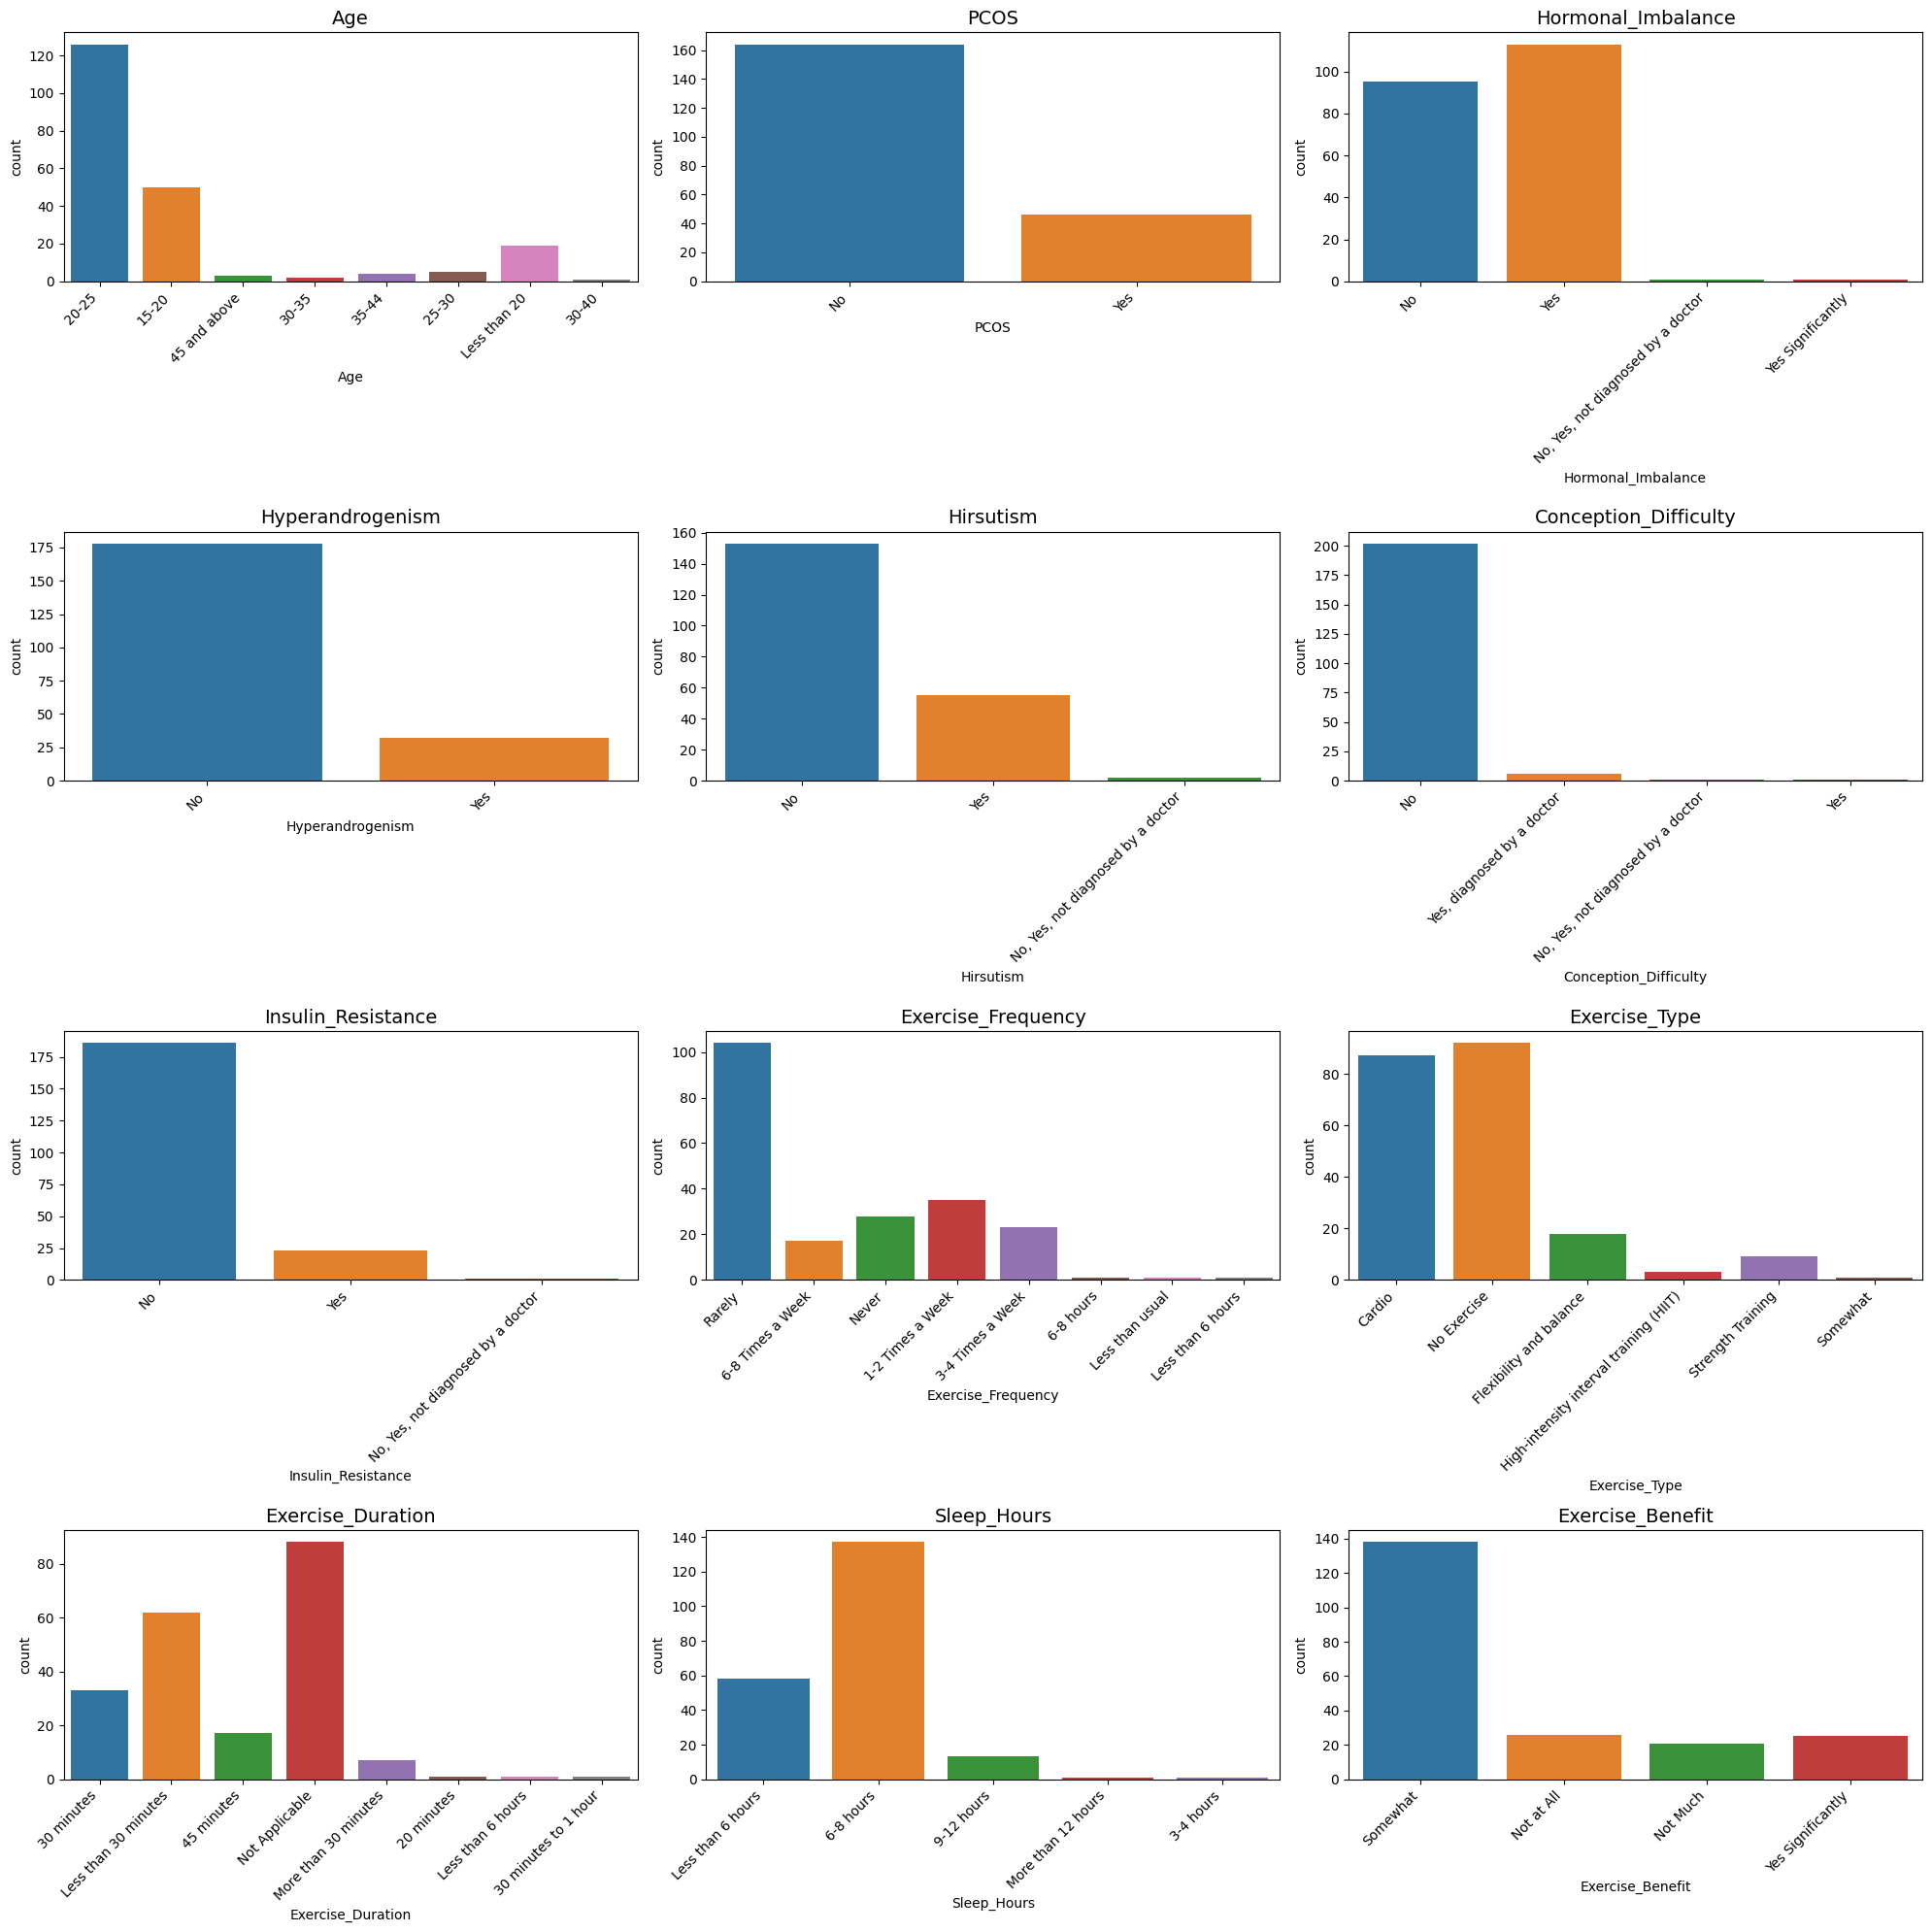

In [15]:
fig,ax=plt.subplots(4,3,figsize=(20,20))
ax=ax.flatten()
i=0
for col in tr.columns[tr.dtypes=='object']:
    sns.countplot(data=tr,x=tr[col],ax=ax[i])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha="right") 
    ax[i].set_title(col, fontsize=14) 
    i+=1
plt.tight_layout()
plt.show()
    

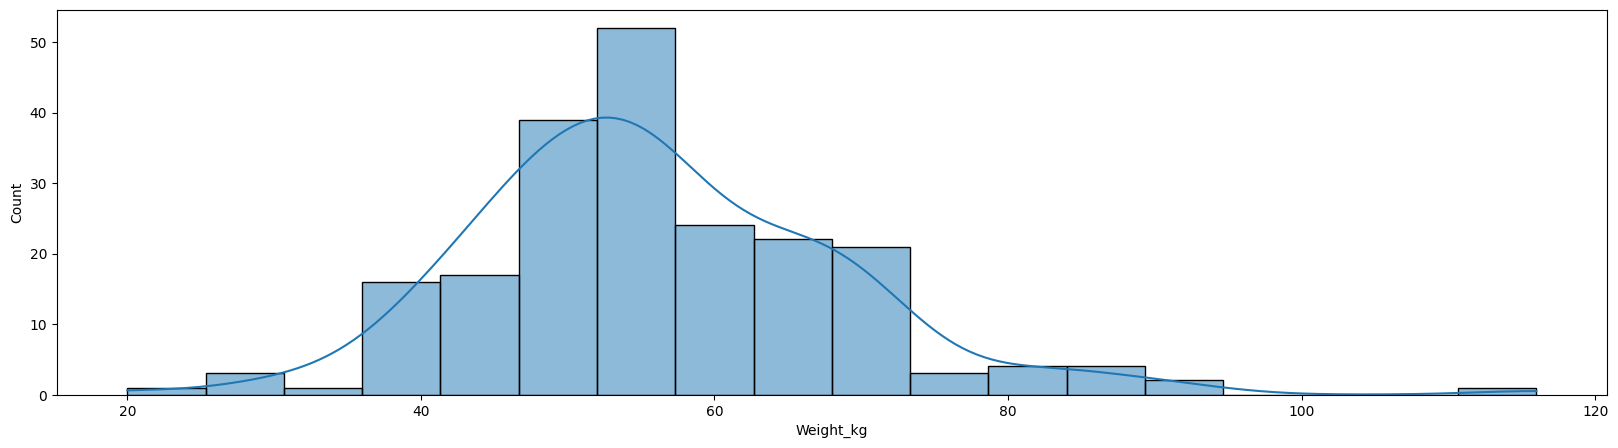

In [16]:
plt.figure(figsize=(20,5))
sns.histplot(data=tr,x='Weight_kg',kde=True)
plt.show()

In [17]:
# Using Label Encoder to encode the Categorical values
# We can also use one hot encoding.. depends on the Model you will be using
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in tr.columns[tr.dtypes=='object']:
    tr[col]=le.fit_transform(tr[col])

In [18]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    210 non-null    int64  
 1   Weight_kg              210 non-null    float64
 2   PCOS                   210 non-null    int64  
 3   Hormonal_Imbalance     210 non-null    int64  
 4   Hyperandrogenism       210 non-null    int64  
 5   Hirsutism              210 non-null    int64  
 6   Conception_Difficulty  210 non-null    int64  
 7   Insulin_Resistance     210 non-null    int64  
 8   Exercise_Frequency     210 non-null    int64  
 9   Exercise_Type          210 non-null    int64  
 10  Exercise_Duration      210 non-null    int64  
 11  Sleep_Hours            210 non-null    int64  
 12  Exercise_Benefit       210 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 21.5 KB


****
# Correlation and Mutual Information
****

In [19]:
# Importing
from sklearn.feature_selection import mutual_info_classif

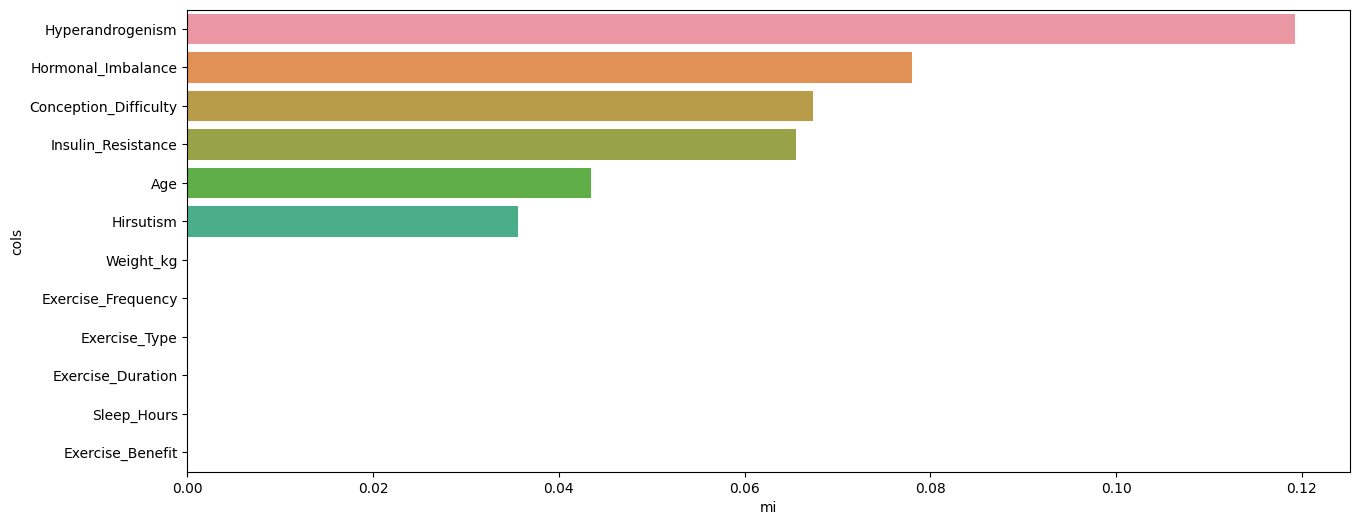

In [20]:
# Calculating Mutual Information
x=tr.drop(columns='PCOS')
y=tr['PCOS']

mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'cols':x.columns,'mi':mi})
mi_df.sort_values(inplace=True,by='mi',ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(data=mi_df,x='mi',y='cols')
plt.show()

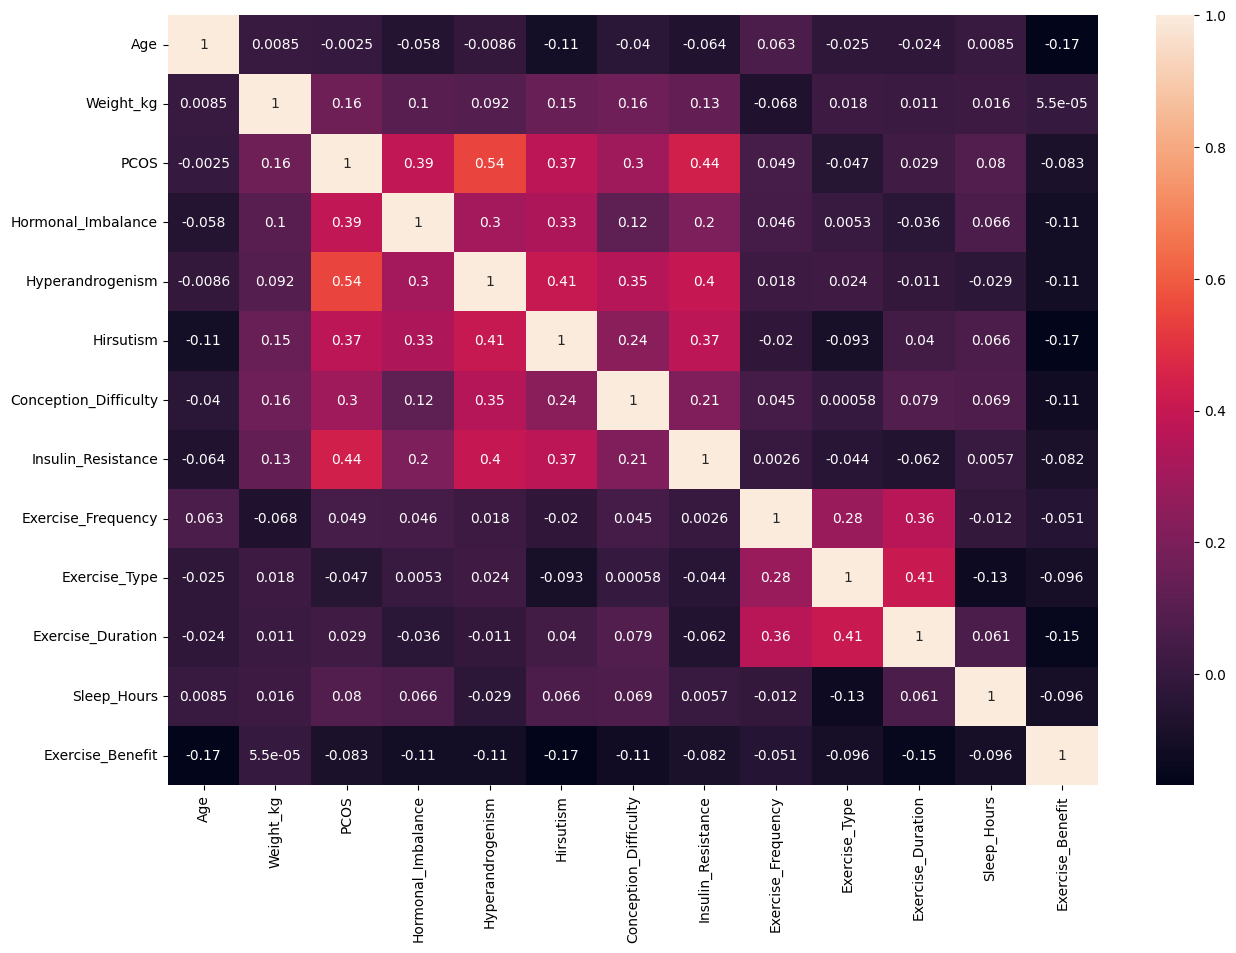

In [21]:
# Correlation
plt.figure(figsize=(15,10))
sns.heatmap(tr.corr(),annot=True)
plt.show()

****
# Preparing the Test Data
****

In [22]:
te=pd.read_csv(r'/kaggle/input/exploring-predictive-health-factors/test.csv')
te.info()
tte=te.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     145 non-null    int64  
 1   Age                    144 non-null    object 
 2   Weight_kg              143 non-null    float64
 3   Hormonal_Imbalance     142 non-null    object 
 4   Hyperandrogenism       144 non-null    object 
 5   Hirsutism              143 non-null    object 
 6   Conception_Difficulty  143 non-null    object 
 7   Insulin_Resistance     144 non-null    object 
 8   Exercise_Frequency     144 non-null    object 
 9   Exercise_Type          144 non-null    object 
 10  Exercise_Duration      145 non-null    object 
 11  Sleep_Hours            144 non-null    object 
 12  Exercise_Benefit       144 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 14.9+ KB


In [23]:
te.drop(columns='ID',inplace=True)
for col in te.columns:
    if te[col].isnull().any()==True:
        te[col]=te[col].fillna(te[col].mode()[0])
le=LabelEncoder()
for col in te.columns[te.dtypes=='object']:
    te[col]=le.fit_transform(te[col])

In [24]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    145 non-null    int64  
 1   Weight_kg              145 non-null    float64
 2   Hormonal_Imbalance     145 non-null    int64  
 3   Hyperandrogenism       145 non-null    int64  
 4   Hirsutism              145 non-null    int64  
 5   Conception_Difficulty  145 non-null    int64  
 6   Insulin_Resistance     145 non-null    int64  
 7   Exercise_Frequency     145 non-null    int64  
 8   Exercise_Type          145 non-null    int64  
 9   Exercise_Duration      145 non-null    int64  
 10  Sleep_Hours            145 non-null    int64  
 11  Exercise_Benefit       145 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 13.7 KB


****
# Splitting the Training Data
****

In [25]:
# importing
from sklearn.model_selection import train_test_split

In [26]:
x=tr.drop(columns='PCOS')
y=tr['PCOS']
x_t,x_te,y_t,y_te=train_test_split(x,y,random_state=20)

****
# Model
****

In [27]:
# importing
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

In [28]:
lgbm = LGBMClassifier(verbose=-1)
params = {
    'boosting_type': ['gbdt', 'dart'],'num_leaves': np.arange(20, 150, 10),'min_child_samples': np.arange(5, 30),  
    'learning_rate': [0.01, 0.05, 0.1, 0.2], 'n_estimators': [2000]}

nrf = RandomizedSearchCV(lgbm,param_distributions=params,cv=10,random_state=20,scoring='roc_auc',
                         n_jobs=-1)

In [29]:
# Fit the model
nrf.fit(x_t, y_t)
# Print the best parameters and the best score
print("Best parameters:", nrf.best_params_)
print("Best ROC AUC score:", nrf.best_score_)

Best parameters: {'num_leaves': 120, 'n_estimators': 2000, 'min_child_samples': 17, 'learning_rate': 0.2, 'boosting_type': 'dart'}
Best ROC AUC score: 0.8583333333333334


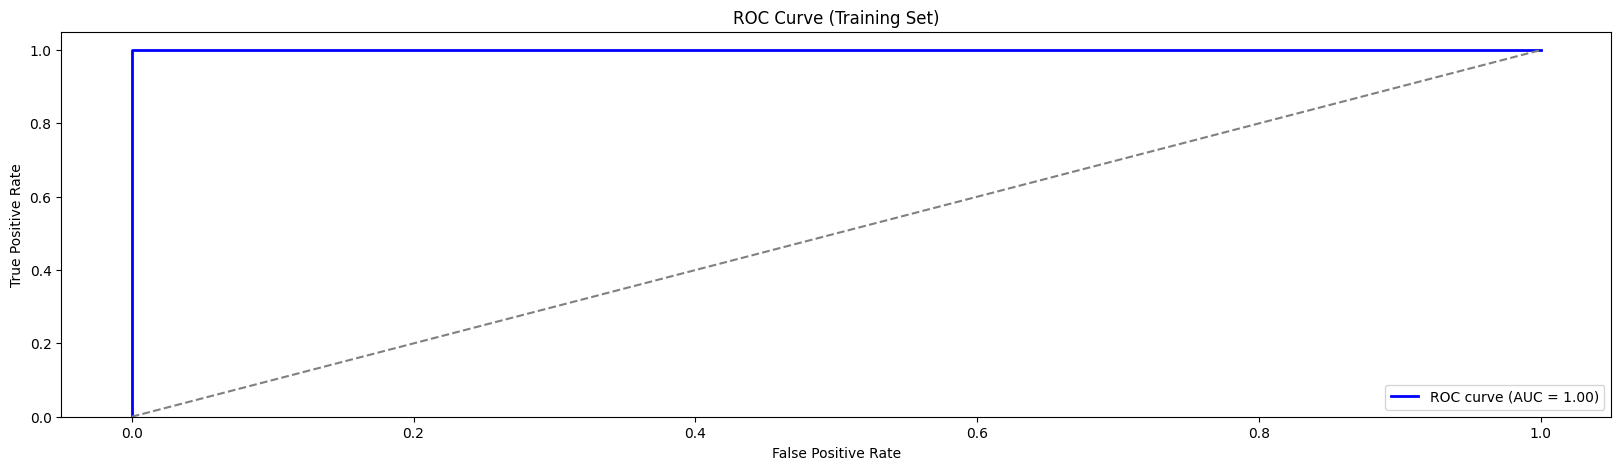

ROC AUC Score (Training Set): 1.0


In [30]:
from sklearn.metrics import roc_curve, auc

y_prob_train = nrf.best_estimator_.predict_proba(x_t)[:, 1]

fpr, tpr, _ = roc_curve(y_t, y_prob_train)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(20,5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--") 
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Training Set)")
plt.legend(loc="lower right")
plt.show()

print("ROC AUC Score (Training Set):", roc_auc)

****
# Prediction
****

In [31]:
pred_prob = nrf.best_estimator_.predict_proba(te)
pcos_probabilities = pred_prob[:, 1]
predictions = (pcos_probabilities >= 0.5).astype(int)

****
# Submission
****

In [32]:
submission = pd.DataFrame({
    'ID': tte['ID'],  
    'PCOS': pcos_probabilities, })

submission.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'  Yaaaay :)")

Submission file saved as 'submission.csv'  Yaaaay :)


****
# Feedback and Suggestions
****

**Kindly Provide feedback and suggesstions to improve the notebook**

**If you liked this notebook or if you found it helpful Kindly Upvote and share ;)**